In [28]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt

In [29]:
df_preprocessed = pd.read_json('./resources/preprocessed.json')
df_roberta = pd.read_json('./resources/roberta_sentiment_final.json')
df_flair = pd.read_json('./resources/flair_sentiment_with_score.json')
df_nltk = pd.read_json('./resources/nltk_sentiment.json')
df_textblob = pd.read_json('./resources/textblob_sentiment.json')

# Preprocessed Dataset infos

## Preprocessed Dataset

In [3]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52517 entries, 0 to 80602
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          52517 non-null  object        
 1   date          52517 non-null  datetime64[ns]
 2   rating        52517 non-null  int64         
 3   review        52517 non-null  object        
 4   thumbs up     52517 non-null  int64         
 5   total thumbs  52517 non-null  int64         
 6   thumbs down   52517 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 3.2+ MB


### Ratings

In [5]:
df_preprocessed['rating'].value_counts(sort=True)

10    18017
0     14533
1      4877
9      3536
2      2697
3      2321
4      1926
8      1621
5      1246
6       891
7       852
Name: rating, dtype: int64

<AxesSubplot:title={'center':'Értékelések eloszlása pontszámonként'}, ylabel='rating'>

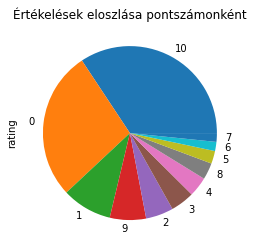

In [7]:
df_preprocessed['rating'].value_counts().plot(kind='pie', title='Értékelések eloszlása pontszámonként')

<AxesSubplot:title={'center':'Értékelések száma pontszámonként'}>

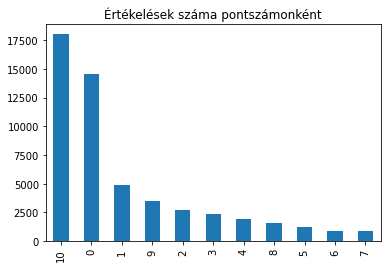

In [37]:
df_preprocessed['rating'].value_counts().plot(kind='bar', title='Értékelések száma pontszámonként')

### Review composition

In [4]:
'''Szavak átlaga review-onként'''
word_count = df_preprocessed['review'].str.split().str.len()
print('Átlagos szószám /review: ', word_count.mean())

'''Karakterek átlaga review-onként'''
char_count = df_preprocessed['review'].str.len()
print('Átlagos karakterszám /review: ', char_count.mean())

'''Szavak számának szórása review-onként'''
print('Szavak számának szórása /review: ', np.std(word_count))

'''Medián szavak számára'''
print('Medián: ', st.median(word_count))

'''Átlagos mondatszám review-onként'''
print('Átlagos mondatszám / review:  ', len(df_flair.index) / len(df_preprocessed))

'''Értékelések átlaga'''
print('Értékelések átlaga: ', df_preprocessed['rating'].values.mean())

Átlagos szószám /review:  44.19492735685588
Átlagos karakterszám /review:  241.89437705885715
Szavak számának szórása /review:  64.43118885417086
Medián:  21
Átlagos mondatszám / review:   5.021040805834302


5.09244625549822

In [25]:
'''Interaktált (like/dislike) reviewk száma'''
interacted_reviews = df_preprocessed[df_preprocessed['total thumbs'] != 0].shape[0]
print('Interaktált (like/dislike) reviewok száma: ', interacted_reviews)

'''Átlagos interakció /review'''
print('Átlagos interakció /review: ', interacted_reviews / len(df_preprocessed))

Interaktált (like/dislike) reviewok száma:  45244
Átlagos interakció /review:  0.8615115105584858


### Wordcloud

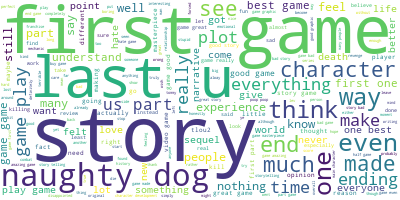

In [24]:
'''Wordcloud készítése a gyakori szavakról'''

from wordcloud import WordCloud

long_string = ','.join(df_preprocessed['review'])

wordcloud = WordCloud(background_color='white', 
                      max_words=1000, 
                      contour_width=3, 
                      contour_color='steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

## Roberta sentiment

In [27]:
df_roberta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263690 entries, 0 to 263689
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   review index     263690 non-null  int64         
 1   name             263690 non-null  object        
 2   date             263690 non-null  datetime64[ns]
 3   score            263690 non-null  int64         
 4   review           263690 non-null  object        
 5   thumbs up        263690 non-null  int64         
 6   total thumbs     263690 non-null  int64         
 7   thumbs down      263690 non-null  int64         
 8   sentiment score  263690 non-null  float64       
 9   sentiment        263690 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.1+ MB


In [16]:
positive = df_roberta[df_roberta['sentiment'] == 'positive'].shape[0]
negative = df_roberta[df_roberta['sentiment'] == 'negative'].shape[0]

print('Pozitív hangulatú mondatok száma: ', positive)
print('Negatív hangulatú mondatok száma: ', negative)

Pozitív hangulatú mondatok száma:  140275
Negatív hangulatú mondatok száma:  123415


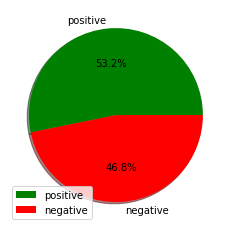

In [17]:
ratings = ['positive', 'negative']
slices = [positive, negative]
colors = ['green', 'red']

plt.pie(slices, labels=ratings, colors=colors, shadow=True, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()

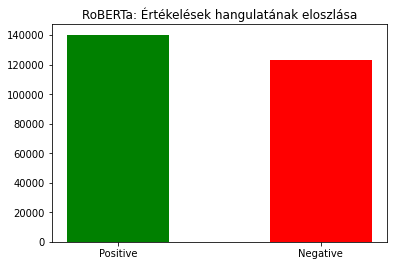

In [18]:
plt.bar([1, 2], [positive, negative], tick_label = ['Positive', 'Negative'], width=0.5, color=['green', 'red'])
plt.title('RoBERTa: Értékelések hangulatának eloszlása')
plt.show()


## Flair sentiment

In [3]:
df_flair.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263690 entries, 0 to 263689
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   review index     263690 non-null  int64         
 1   name             263690 non-null  object        
 2   date             263690 non-null  datetime64[ns]
 3   rating           263690 non-null  int64         
 4   review           263690 non-null  object        
 5   thumbs up        263690 non-null  int64         
 6   total thumbs     263690 non-null  int64         
 7   thumbs down      263690 non-null  int64         
 8   sentiment score  263690 non-null  float64       
 9   sentiment        263690 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.1+ MB


In [19]:
positive = df_flair[df_flair['sentiment'] == 'positive'].shape[0]
negative = df_flair[df_flair['sentiment'] == 'negative'].shape[0]

print('Pozitív hangulatú mondatok száma: ', positive)
print('Negatív hangulatú mondatok száma: ', negative)

Pozitív hangulatú mondatok száma:  126414
Negatív hangulatú mondatok száma:  137276


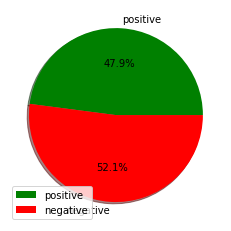

In [20]:
ratings = ['positive', 'negative']
slices = [positive, negative]
colors = ['green', 'red']

plt.pie(slices, labels=ratings, colors=colors, shadow=True, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()

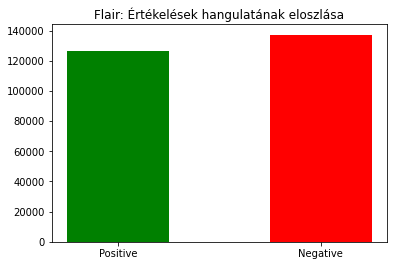

In [21]:
plt.bar([1, 2], [positive, negative], tick_label = ['Positive', 'Negative'], width=0.5, color=['green', 'red'])
plt.title('Flair: Értékelések hangulatának eloszlása')
plt.show()

## NLTK Vader sentiment

In [62]:
df_nltk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263690 entries, 0 to 263689
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   review index     263690 non-null  int64         
 1   name             263690 non-null  object        
 2   date             263690 non-null  datetime64[ns]
 3   rating           263690 non-null  int64         
 4   review           263690 non-null  object        
 5   thumbs up        263690 non-null  int64         
 6   total thumbs     263690 non-null  int64         
 7   thumbs down      263690 non-null  int64         
 8   sentiment_score  263690 non-null  float64       
 9   sentiment        263690 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.1+ MB


In [34]:
positive = df_nltk[df_nltk['sentiment'] == 'positive'].shape[0]
negative = df_nltk[df_nltk['sentiment'] == 'negative'].shape[0]
neutral = df_nltk[df_nltk['sentiment'] == 'neutral'].shape[0]

print('Pozitív hangulatú mondatok száma: ', positive)
print('Negatív hangulatú mondatok száma: ', negative)
print('Neutrális hangulatú mondatok száma: ', neutral)

Pozitív hangulatú mondatok száma:  116779
Negatív hangulatú mondatok száma:  82553
Neutrális hangulatú mondatok száma:  64358


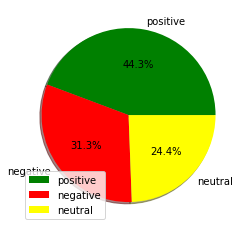

In [31]:
ratings = ['positive', 'negative', 'neutral']
slices = [positive, negative, neutral]
colors = ['green', 'red', 'yellow']

plt.pie(slices, labels=ratings, colors=colors, shadow=True, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()

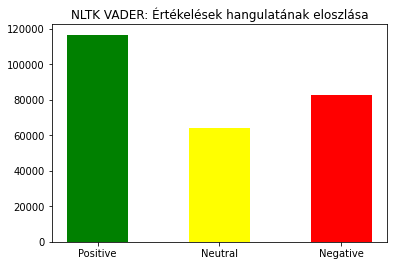

In [32]:
plt.bar([1, 2, 3], [positive, neutral, negative], tick_label = ['Positive', 'Neutral', 'Negative'], width=0.5, color=['green', 'yellow', 'red'])
plt.title('NLTK VADER: Értékelések hangulatának eloszlása')
plt.show()

## Textblob sentiment

In [69]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263690 entries, 0 to 263689
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   review index     263690 non-null  int64         
 1   name             263690 non-null  object        
 2   date             263690 non-null  datetime64[ns]
 3   rating           263690 non-null  int64         
 4   review           263690 non-null  object        
 5   thumbs up        263690 non-null  int64         
 6   total thumbs     263690 non-null  int64         
 7   thumbs down      263690 non-null  int64         
 8   sentiment_score  263690 non-null  float64       
 9   sentiment        263690 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.1+ MB


In [35]:
positive = df_textblob[df_textblob['sentiment'] == 'positive'].shape[0]
negative = df_textblob[df_textblob['sentiment'] == 'negative'].shape[0]
neutral = df_nltk[df_nltk['sentiment'] == 'neutral'].shape[0]

print('Pozitív hangulatú mondatok száma: ', positive)
print('Negatív hangulatú mondatok száma: ', negative)
print('Neutrális hangulatú mondatok száma: ', neutral)

Pozitív hangulatú mondatok száma:  98761
Negatív hangulatú mondatok száma:  105790
Neutrális hangulatú mondatok száma:  64358


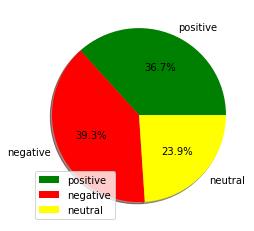

In [36]:
ratings = ['positive', 'negative', 'neutral']
slices = [positive, negative, neutral]
colors = ['green', 'red', 'yellow']

plt.pie(slices, labels=ratings, colors=colors, shadow=True, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()

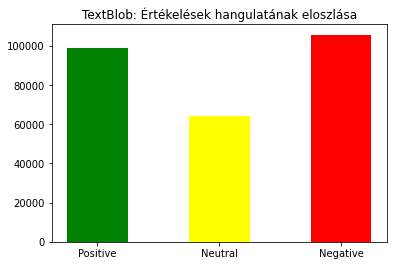

In [37]:
plt.bar([1, 2, 3], [positive, neutral, negative], tick_label = ['Positive', 'Neutral', 'Negative'], width=0.5, color=['green', 'yellow', 'red'])
plt.title('TextBlob: Értékelések hangulatának eloszlása')
plt.show()